# Practice notebook

## **Reason**
The idea of this notebook is primarily for studying. A data engineer with limited knowledge of data science. Therefore, starting off with the Linear Regression, I believe it's a good one to use and understand what's happening. 

---


### What is Linear Regression
According to the [Statistics by Jim](https://statisticsbyjim.com/regression/linear-regression/), linear regression is a statistic method that models the relationships between at least one explanatory variable and an outcome variable. The main idea behind the linear regression is finding the best straight line that minimizes the difference between the observed values and predicted values.

- **Dependent Variable:** Value that are meant to be predicted.
- **Independent Variable:** A value (Simple Linear Regression) or multiple values (Multiple Regression) that are used to explain the dependent variable that is being analyzed.

### Linear regression has two primary purposes:
1. **Coefficients:** Represent the estimated magnitude and direction, positive/negative, of the relationship between each independent variable and the dependent variable.
2. **Equation:** Allows it to predict the mean value of the dependent variable given the values of the independent variables that you specify.

### Evaluation Metrics
- **R-squared (Coefficient of determination):** Metric to evaluate the performance of regression models. It explains the variation in the dependent variable, ranging from 0 to 1, where 1 indicates a perfect fir of the model to the data.
- **Mean Squared Error (MSE):** Metric to evaluate the performance and accuracy of the predictive models.
- **Mean Absolute Error (MAE):** Metric to evaluate the accuracy of regression models. It measures the average absolute difference between the predicted values and the actual target values.

---


## **References**
[R-squared](https://towardsdatascience.com/interpreting-r%C2%B2-a-narrative-guide-for-the-perplexed-086a9a69c1ec)<br>
[Mean Squared Error](https://medium.com/@TheDataScience-ProF/understanding-mean-squared-error-mse-in-machine-learning-442795910802)<br>
[Mean Absolute Error](https://medium.com/@m.waqar.ahmed/understanding-mean-absolute-error-mae-in-regression-a-practical-guide-26e80ebb97df)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_test = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")
df_train = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")

In [3]:
# Analyzing the info we noticed that the df_train has a single NAN value and an outlier.
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
# The df_test looks more normal.
df_test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


<Axes: >

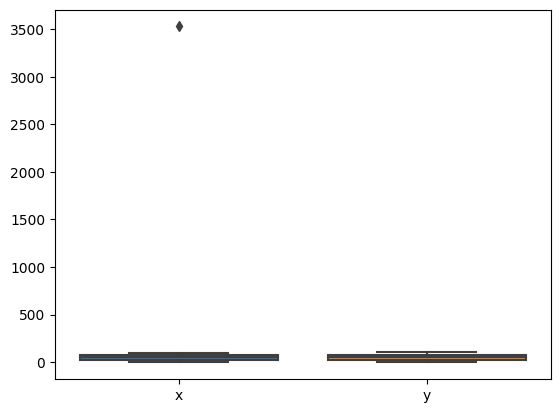

In [5]:
# Plotting the boxplot for a visual representation. As you can see the outlier is plotted there.
sns.boxplot(data=df_train)

In [6]:
# Treating the missing value by replacing with the mean.
df_train["y"] = df_train["y"].fillna(df_train["y"].mean())

# Use the IQR to measure the spread that is not affected by outliers.
q1 = df_train.quantile(0.25)
q3 = df_train.quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr

# Replace the outlier by the mean
mean_value = df_train["x"].mean()
df_train["x"] = np.where((df_train["x"] > upper_bound["x"]), mean_value, df_train["x"])

<Axes: >

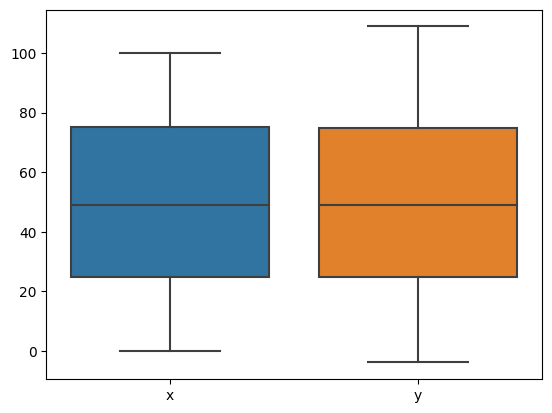

In [7]:
# Now the boxplot looks good.
sns.boxplot(data=df_train)

In [8]:
# x = features // y = target
x_train = df_train[["x"]]
y_train = df_train["y"]

x_test = df_test[["x"]]
y_test = df_test["y"]

In [9]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)

In [11]:
mse = round(mean_squared_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

print(f'Mean Squared Error: {mse}')

# The model explains 99% of the variance.
print(f'R-squared: {r2}')

Mean Squared Error: 9.44
R-squared: 0.99
